In [8]:
import warnings
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from pandas 
import datetime
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error


In [9]:
plt.style.use('fivethirtyeight')

In [ ]:
folder_path = "./Dataset/Patna/Dynamic/"  # Replace with the path to your folder

os.listdir(folder_path)

['arima_CH4.ipynb',
 'arima_CO.ipynb',
 'arima_CO2.ipynb',
 'arima_NO2.ipynb',
 'arima_no2.py',
 'arima_pm10.ipynb',
 'arima_pm25.ipynb',
 'arima_relative_humidity.ipynb',
 'arima_temp.ipynb',
 'datacoll.ipynb',
 'teststreamlit.py',
 'vayu.db',
 'vayu_Patna_dynamic_sensor_data_August_2024.csv',
 'vayu_Patna_dynamic_sensor_data_December_2024.csv',
 'vayu_Patna_dynamic_sensor_data_February_2025.csv',
 'vayu_Patna_dynamic_sensor_data_January_2025.csv',
 'vayu_Patna_dynamic_sensor_data_July_2024.csv',
 'vayu_Patna_dynamic_sensor_data_June_2024.csv',
 'vayu_Patna_dynamic_sensor_data_March_2025.csv',
 'vayu_Patna_dynamic_sensor_data_November_2024.csv',
 'vayu_Patna_dynamic_sensor_data_October_2024.csv',
 'vayu_Patna_dynamic_sensor_data_September_2024.csv']

In [ ]:
color = sns.color_palette()
print('Please wait. Importing data...')
multi_df = []

# df = pd.read_csv("vayu_Patna_dynamic_sensor_data_March_2025.csv", encoding = "ISO-8859-1")


# Folder containing the CSV files
folder_path = "./Dataset/Patna/Dynamic/"  # Replace with the path to your folder

# Loop through all files in the folder
for file in os.listdir(folder_path):
    if file.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(folder_path, file)
        print(f"Reading {file_path}...")
        df1 = pd.read_csv(file_path, encoding="ISO-8859-1")  # Adjust encoding if needed
        multi_df.append(df1)

# combine all DataFrames into one
df = pd.concat(multi_df, ignore_index=True)

print('import completed.')

Please wait. Importing data...
Reading ./vayu_Patna_dynamic_sensor_data_August_2024.csv...


Reading ./vayu_Patna_dynamic_sensor_data_December_2024.csv...
Reading ./vayu_Patna_dynamic_sensor_data_February_2025.csv...
Reading ./vayu_Patna_dynamic_sensor_data_January_2025.csv...
Reading ./vayu_Patna_dynamic_sensor_data_July_2024.csv...
Reading ./vayu_Patna_dynamic_sensor_data_June_2024.csv...


/tmp/ipykernel_43827/3265745317.py:16: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(file_path, encoding="ISO-8859-1")  # Adjust encoding if needed


Reading ./vayu_Patna_dynamic_sensor_data_March_2025.csv...
Reading ./vayu_Patna_dynamic_sensor_data_November_2024.csv...
Reading ./vayu_Patna_dynamic_sensor_data_October_2024.csv...
Reading ./vayu_Patna_dynamic_sensor_data_September_2024.csv...
import completed.


In [12]:
def date_parser(x):
    return datetime.datetime.strptime(x, '%Y-%m-%d')

In [13]:
df.head()

,id,device_name,lat,long,pm_25,pm_10,no2,co,co2,ch4,temp,rh,data_created_time
0,1394763,TARA101,25.586355,85.178223,29.4,55.8,14.37,1.48,NaN,NaN,36.8,57.0,2024-08-01 00:00:00+00:00
1,1394785,TARA070,25.598154,85.171898,15.0,20.3,972.01,NaN,611.0,NaN,34.6,63.0,2024-08-01 00:00:00+00:00
2,1394786,TARA082,25.640917,85.104034,15.6,15.6,101.67,NaN,1258.0,NaN,28.6,45.0,2024-08-01 00:00:00+00:00
3,1394793,TARA090,25.599537,85.177139,28.6,38.6,532.40,NaN,462.0,NaN,34.1,66.0,2024-08-01 00:00:00+00:00
4,1394809,TARA101,25.586355,85.178223,39.3,63.3,4.57,1.35,NaN,NaN,36.8,57.0,2024-08-01 00:01:00+00:00


In [14]:
patna_data_co = df[['data_created_time', 'co']]

In [15]:
# patna_data = df[df.state == 'patna'].sort_values(by='date', ascending=0)
# patna_data_co = df[['date', 'co']]
patna_data_co['co'] = patna_data_co['co'].map(lambda x: str(x))
patna_data_co = patna_data_co[patna_data_co.co != 'nan']
patna_data_co['co'] = pd.to_numeric(patna_data_co['co'])
patna_data_co['date'] = patna_data_co['data_created_time'].map(lambda x: str(x)[:10])
patna_data_co['date'] = patna_data_co['date'].map(lambda x: date_parser(x))
patna_data_co.index = patna_data_co['date']
patna_data_co = patna_data_co.drop(['date'], axis=1)

/tmp/ipykernel_43827/272554519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patna_data_co['co'] = patna_data_co['co'].map(lambda x: str(x))


In [16]:
patna_data_co.tail()

,data_created_time,co
date,,
2024-09-30,2024-09-30 23:57:00+00:00,1.73
2024-09-30,2024-09-30 23:58:00+00:00,1.72
2024-09-30,2024-09-30 23:58:00+00:00,1.74
2024-09-30,2024-09-30 23:59:00+00:00,1.72
2024-09-30,2024-09-30 23:59:00+00:00,1.75


In [17]:
patna_data_co = patna_data_co.fillna(patna_data_co.bfill())
patna_data_co = patna_data_co['co'].resample('D').mean()

date
2024-06-07    1.451589
2024-06-08    3.857292
2024-06-09    3.916842
2024-06-10    4.191897
2024-06-11    3.922266
                ...   
2025-03-13    1.176654
2025-03-14    1.077530
2025-03-15    1.028017
2025-03-16    1.178762
2025-03-17    0.954262
Freq: D, Name: co, Length: 284, dtype: float64


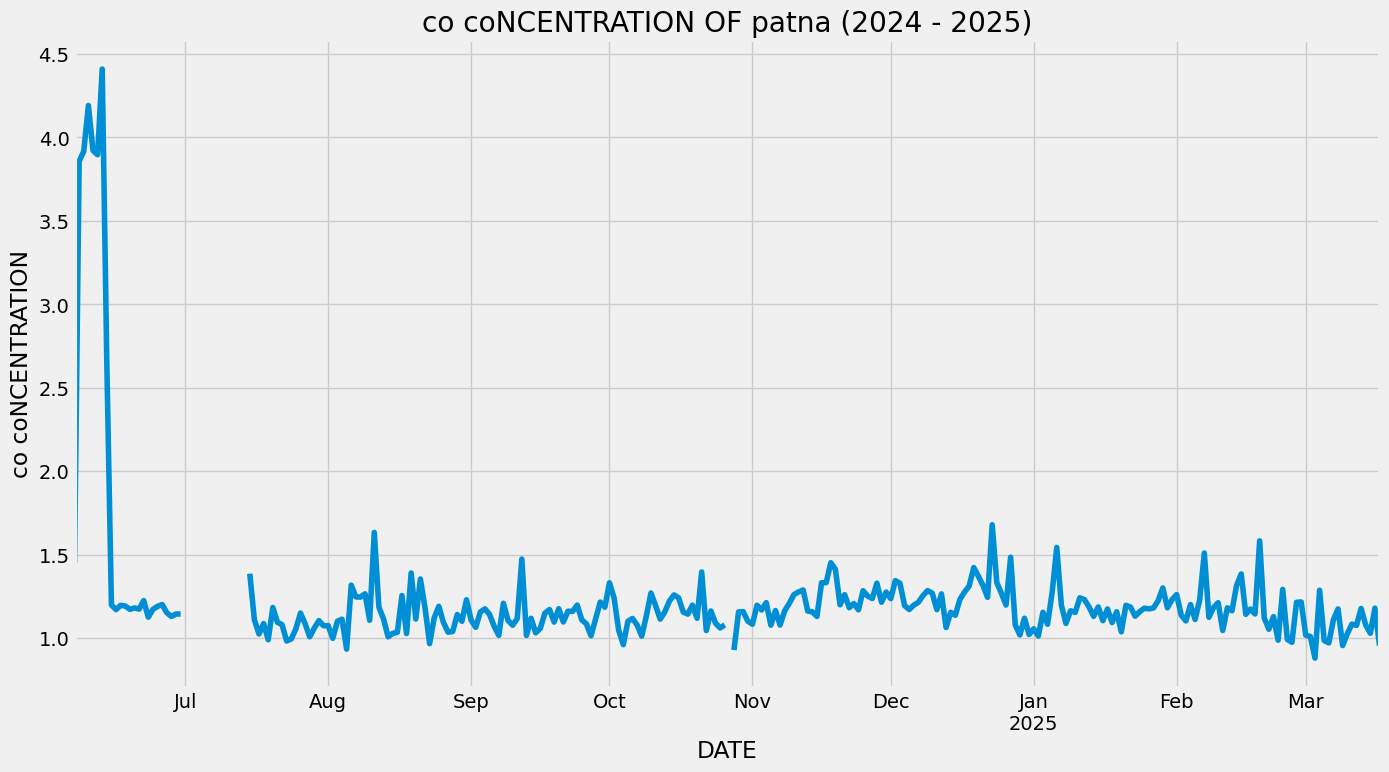

In [18]:

print(patna_data_co)

patna_data_co.plot(figsize=[15, 8])
plt.xlabel("DATE")
plt.ylabel("co coNCENTRATION")
plt.title("co coNCENTRATION OF patna (2024 - 2025)")
plt.show()

/home/deepesh/miniconda3/envs/myenv/lib/python3.8/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


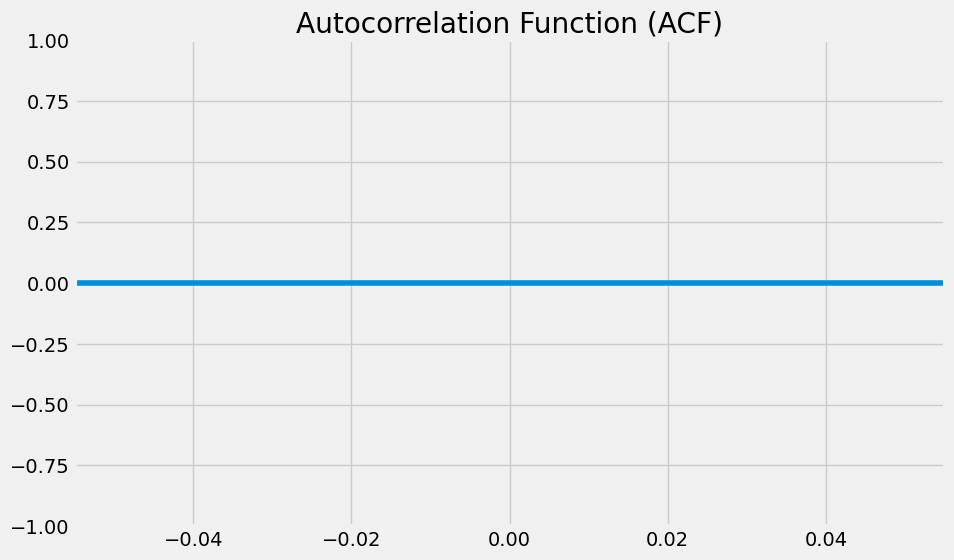

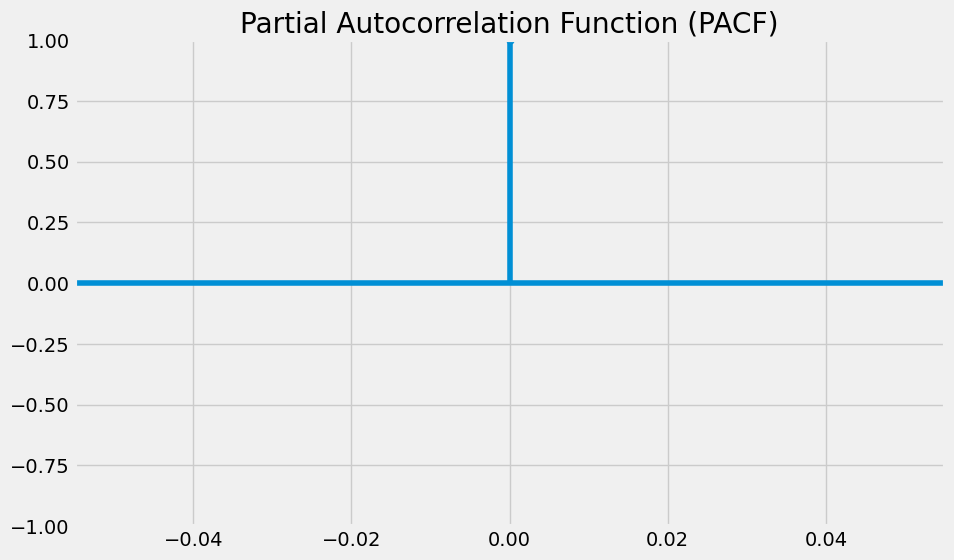

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF
plt.figure(figsize=(10, 6))
plot_acf(patna_data_co, lags=30, ax=plt.gca())  # Adjust lags as needed
plt.title("Autocorrelation Function (ACF)")
plt.show()

# Plot PACF
plt.figure(figsize=(10, 6))
plot_pacf(patna_data_co, lags=30, ax=plt.gca(), method='ywm')  # Adjust lags as needed
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.41498D-01    |proj g|=  7.51641D-01

At iterate    5    f= -1.96603D-01    |proj g|=  1.75542D-01

At iterate   10    f= -3.57028D-01    |proj g|=  2.21109D+00

At iterate   15    f= -6.02692D-01    |proj g|=  5.38027D-01

At iterate   20    f= -6.65231D-01    |proj g|=  2.71001D+00


 This problem is unconstrained.



At iterate   25    f= -6.91972D-01    |proj g|=  3.34092D-02

At iterate   30    f= -6.92173D-01    |proj g|=  9.45461D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     43      1     0     0   9.455D-05  -6.922D-01
  F = -0.69217306813864243     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9996      0.001   1168.730      0.000       0.998       1.001
ma.L1         -0.8537      0.031    -27.310      0.000      -0

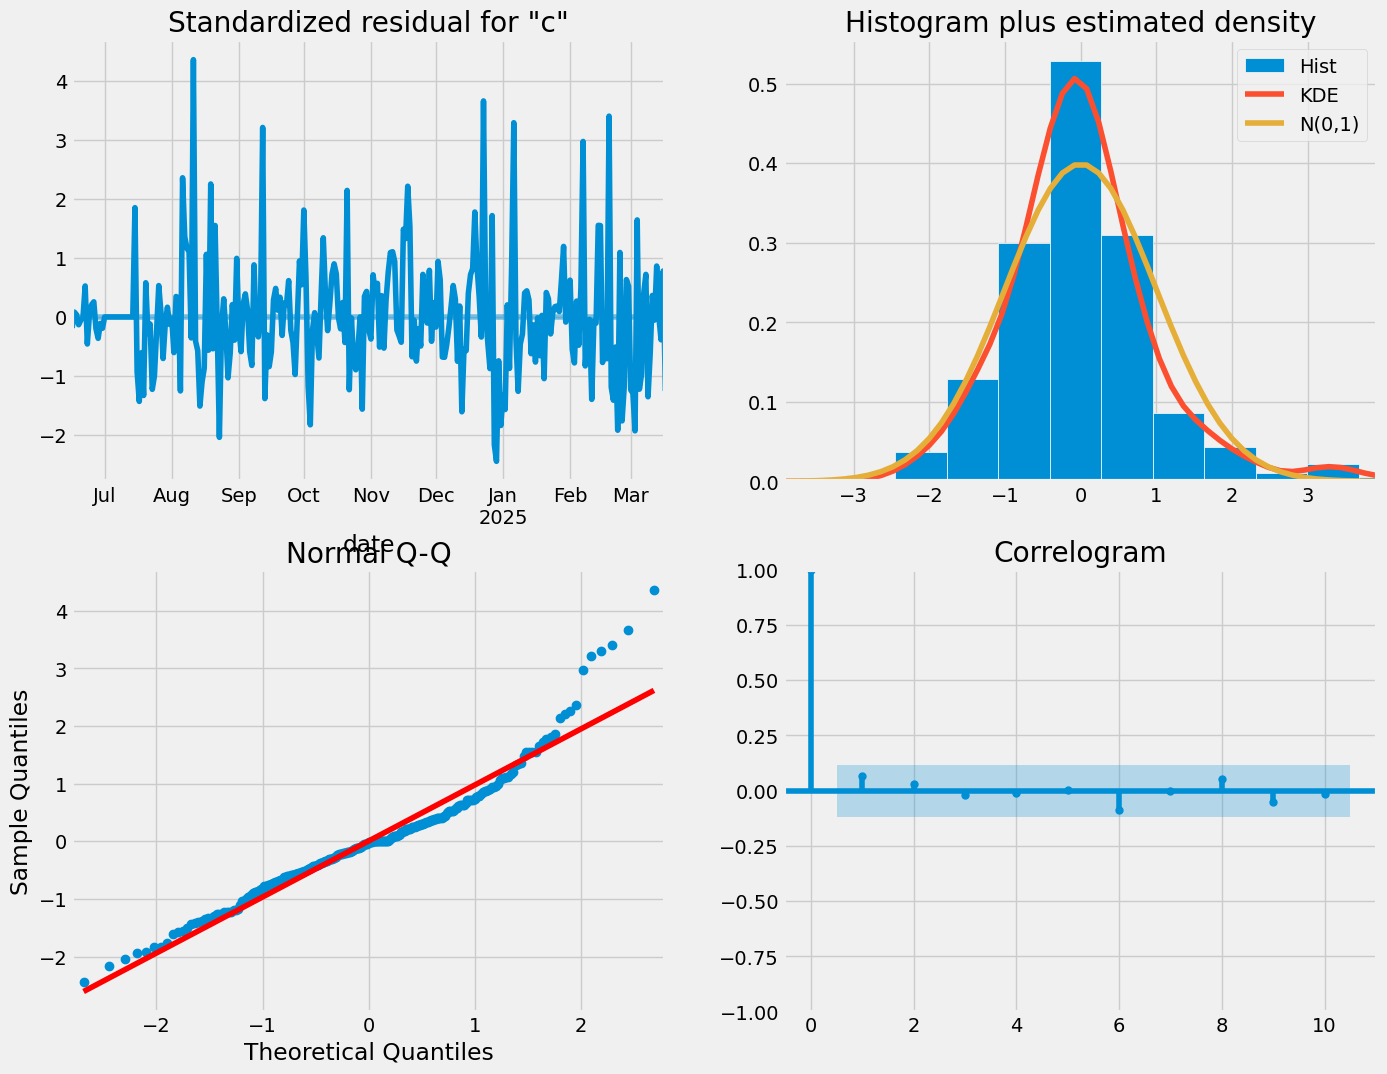

In [27]:

mod = sm.tsa.statespace.SARIMAX(patna_data_co,
                                order=(1, 0, 1),
                                seasonal_order=(1, 0, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

results.plot_diagnostics(figsize=(15, 12))
plt.show()

The Root Mean Squared Error of our prediction is 0.12
2025-03-18    1.063113
2025-03-19    1.067658
2025-03-20    1.055393
2025-03-21    1.064423
2025-03-22    1.069090
2025-03-23    1.054359
2025-03-24    1.078974
2025-03-25    1.064500
2025-03-26    1.064120
2025-03-27    1.063637
2025-03-28    1.063285
2025-03-29    1.062906
2025-03-30    1.062408
2025-03-31    1.062153
2025-04-01    1.061657
2025-04-02    1.061248
2025-04-03    1.060838
2025-04-04    1.060429
2025-04-05    1.060021
2025-04-06    1.059612
Freq: D, Name: predicted_mean, dtype: float64


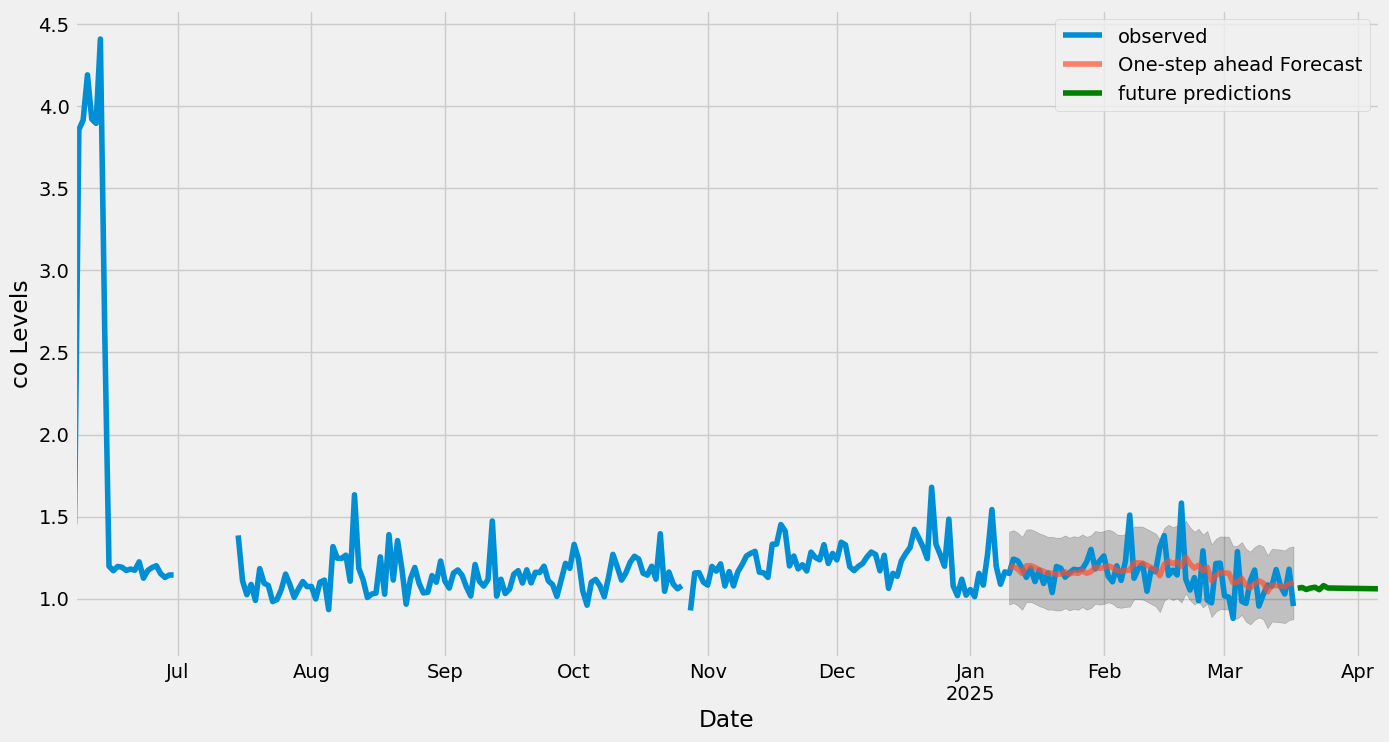

In [ ]:

pred = results.get_prediction(start=pd.to_datetime('2025-01-10'), dynamic=False)
pred_ci = pred.conf_int()

ax = patna_data_co['2024':].plot(figsize=[15, 8], label='observed')
pred.predicted_mean.plot(figsize=[15, 8], ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('co Levels')
plt.legend()


patna_data_co_forecasted = pred.predicted_mean
patna_data_co_truth = patna_data_co['2025-03-16':]

# compute the mean square error
rmse = (((patna_data_co_forecasted - patna_data_co_truth) ** 2).mean()) ** 0.5
print('The Root Mean Squared Error of our prediction is {}'.format(round(rmse, 2)))

forecast = results.forecast(20)
print(forecast)
forecast.plot(figsize=[15, 8], color='green', label='future predictions')
plt.legend()
plt.show()

In [ ]:
import warnings
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from pandas 
import datetime
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

def date_parser(x):
    return datetime.datetime.strptime(x, '%Y-%m-%d')

print('Please wait. Importing data...')
multi_df = []

# df = pd.read_csv("vayu_Patna_dynamic_sensor_data_March_2025.csv", encoding = "ISO-8859-1")


# Folder containing the CSV files
folder_path = "./Dataset/Patna/Dynamic/"  # Replace with the path to your folder

# Loop through all files in the folder
for file in os.listdir(folder_path):
    if file.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(folder_path, file)
        # print(f"Reading {file_path}...")
        df1 = pd.read_csv(file_path, encoding="ISO-8859-1")  # Adjust encoding if needed
        multi_df.append(df1)

# combine all DataFrames into one
df = pd.concat(multi_df, ignore_index=True)

patna_data_co = df[['data_created_time', 'co', 'lat', 'long','id']]
patna_data_co = patna_data_co.fillna(patna_data_co.bfill())


# Prepare the data
patna_data_co['co'] = patna_data_co['co'].map(lambda x: str(x))
patna_data_co = patna_data_co[patna_data_co.co != 'nan']
patna_data_co['co'] = pd.to_numeric(patna_data_co['co'])
patna_data_co['date'] = patna_data_co['data_created_time'].map(lambda x: str(x)[:10])
patna_data_co['date'] = patna_data_co['date'].map(lambda x: date_parser(x))
# patna_data_co.index = patna_data_co['date']
# patna_data_co = patna_data_co.drop(['date'], axis=1)

# patna_data_co = patna_data_co['co'].resample('D').mean()

# Aggregate data: take the mean of lat, long, and co for each date
patna_data_co = patna_data_co.groupby('date').agg({
    'id': 'first',  # Count the number of records for each date
    'lat': 'first',  # You can also use 'first' or 'median' if preferred
    'long': 'first',  # You can also use 'first' or 'median' if preferred
    'co': 'mean'     # Resample CO values by taking the mean
}).reset_index()

# Set the date as the index for time series modeling
patna_data_co.set_index('date', inplace=True)


# Fit the SARIMAX model
mod = sm.tsa.statespace.SARIMAX(patna_data_co['co'],
                                order=(1, 0, 1),
                                seasonal_order=(1, 0, 1, 12),  # Adjust seasonal period if needed
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

# Generate predictions
patna_data_co['predicted_CO'] = results.predict(start=0, end=len(patna_data_co) - 1)
patna_data_co.reset_index(inplace=True)

# Forecast for the next 20 days
forecast_steps = 20
forecast_index = pd.date_range(start=patna_data_co['date'].iloc[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_values = results.forecast(steps=forecast_steps)

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({
    'id': [None] * forecast_steps,
    'date': forecast_index,
    'lat': patna_data_co['lat'].iloc[-1],  # Use the last known latitude
    'long': patna_data_co['long'].iloc[-1],  # Use the last known longitude
    'co': [None] * forecast_steps,  # No actual CO values for the forecast
    'predicted_CO': forecast_values
})

# Combine the original data with the forecast
final_df = pd.concat([patna_data_co, forecast_df], ignore_index=True)

# Save the final DataFrame to a CSV file
output_columns = ['lat', 'long', 'date', 'co', 'predicted_CO']
final_df[output_columns].to_csv('patna_co_predictions_with_forecast.csv', index=False)

print("CSV file 'patna_co_predictions_with_forecast.csv' has been created.")

Please wait. Importing data...


/tmp/ipykernel_42170/2280129592.py:28: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(file_path, encoding="ISO-8859-1")  # Adjust encoding if needed


KeyError: "Column(s) ['id'] do not exist"

In [3]:
patna_data_co

date
2024-06-07    1.391399
2024-06-08    4.306833
2024-06-09    2.660626
2024-06-10    4.482678
2024-06-11    3.976079
                ...   
2025-03-14    1.044454
2025-03-15    1.010438
2025-03-16    1.204979
2025-03-17    1.040952
2025-03-18    1.800000
Freq: D, Name: co, Length: 285, dtype: float64